# 我們使用最基礎的 Gradient Descent 方法來找到y=f(x)=Wx+b 當中的 W 和 b , 用來預測 PokenMon 升級後的 CP 值
* 主要的學習教材為台大電機系李弘毅教授的教材 : http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/Linear%20Regression.mp4
* 這問題可以視為 Regression 問題 
* Gradient Descent 的推導會使用到基礎的微分觀念，不了解的話可以參考 : http://www.amath.nchu.edu.tw/~tdoc/4_2.htm
* 實驗資料可以從這裡下載 : https://www.openintro.org/stat/data/?data=pokemon

## 我們先取前 50 筆資料，作為實驗素材

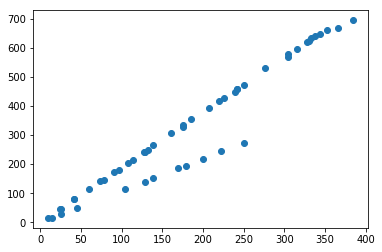

In [1]:
import numpy as np
import pandas as pd
pd = pd.read_csv("./pokemon.csv")
newcp = np.array(pd['cp_new'])
cp = np.array(pd['cp'])
cp = cp[:50]
newcp = newcp[:50]

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  



plt.scatter(cp, newcp)
plt.show()

## Tensorflow 學習網站 : https://www.datacamp.com/community/tutorials/tensorflow-tutorial

In [104]:
import tensorflow as tf
# Initialize placeholders 
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

W = tf.Variable([1], dtype=tf.float32)
b = tf.Variable([1], dtype=tf.float32)
linear_model = W*x + b

In [105]:
squared_deltas = tf.square(linear_model - y)
loss = (tf.reduce_sum(squared_deltas))

In [106]:
optimizer = tf.train.GradientDescentOptimizer(0.0000001)
train = optimizer.minimize(loss)

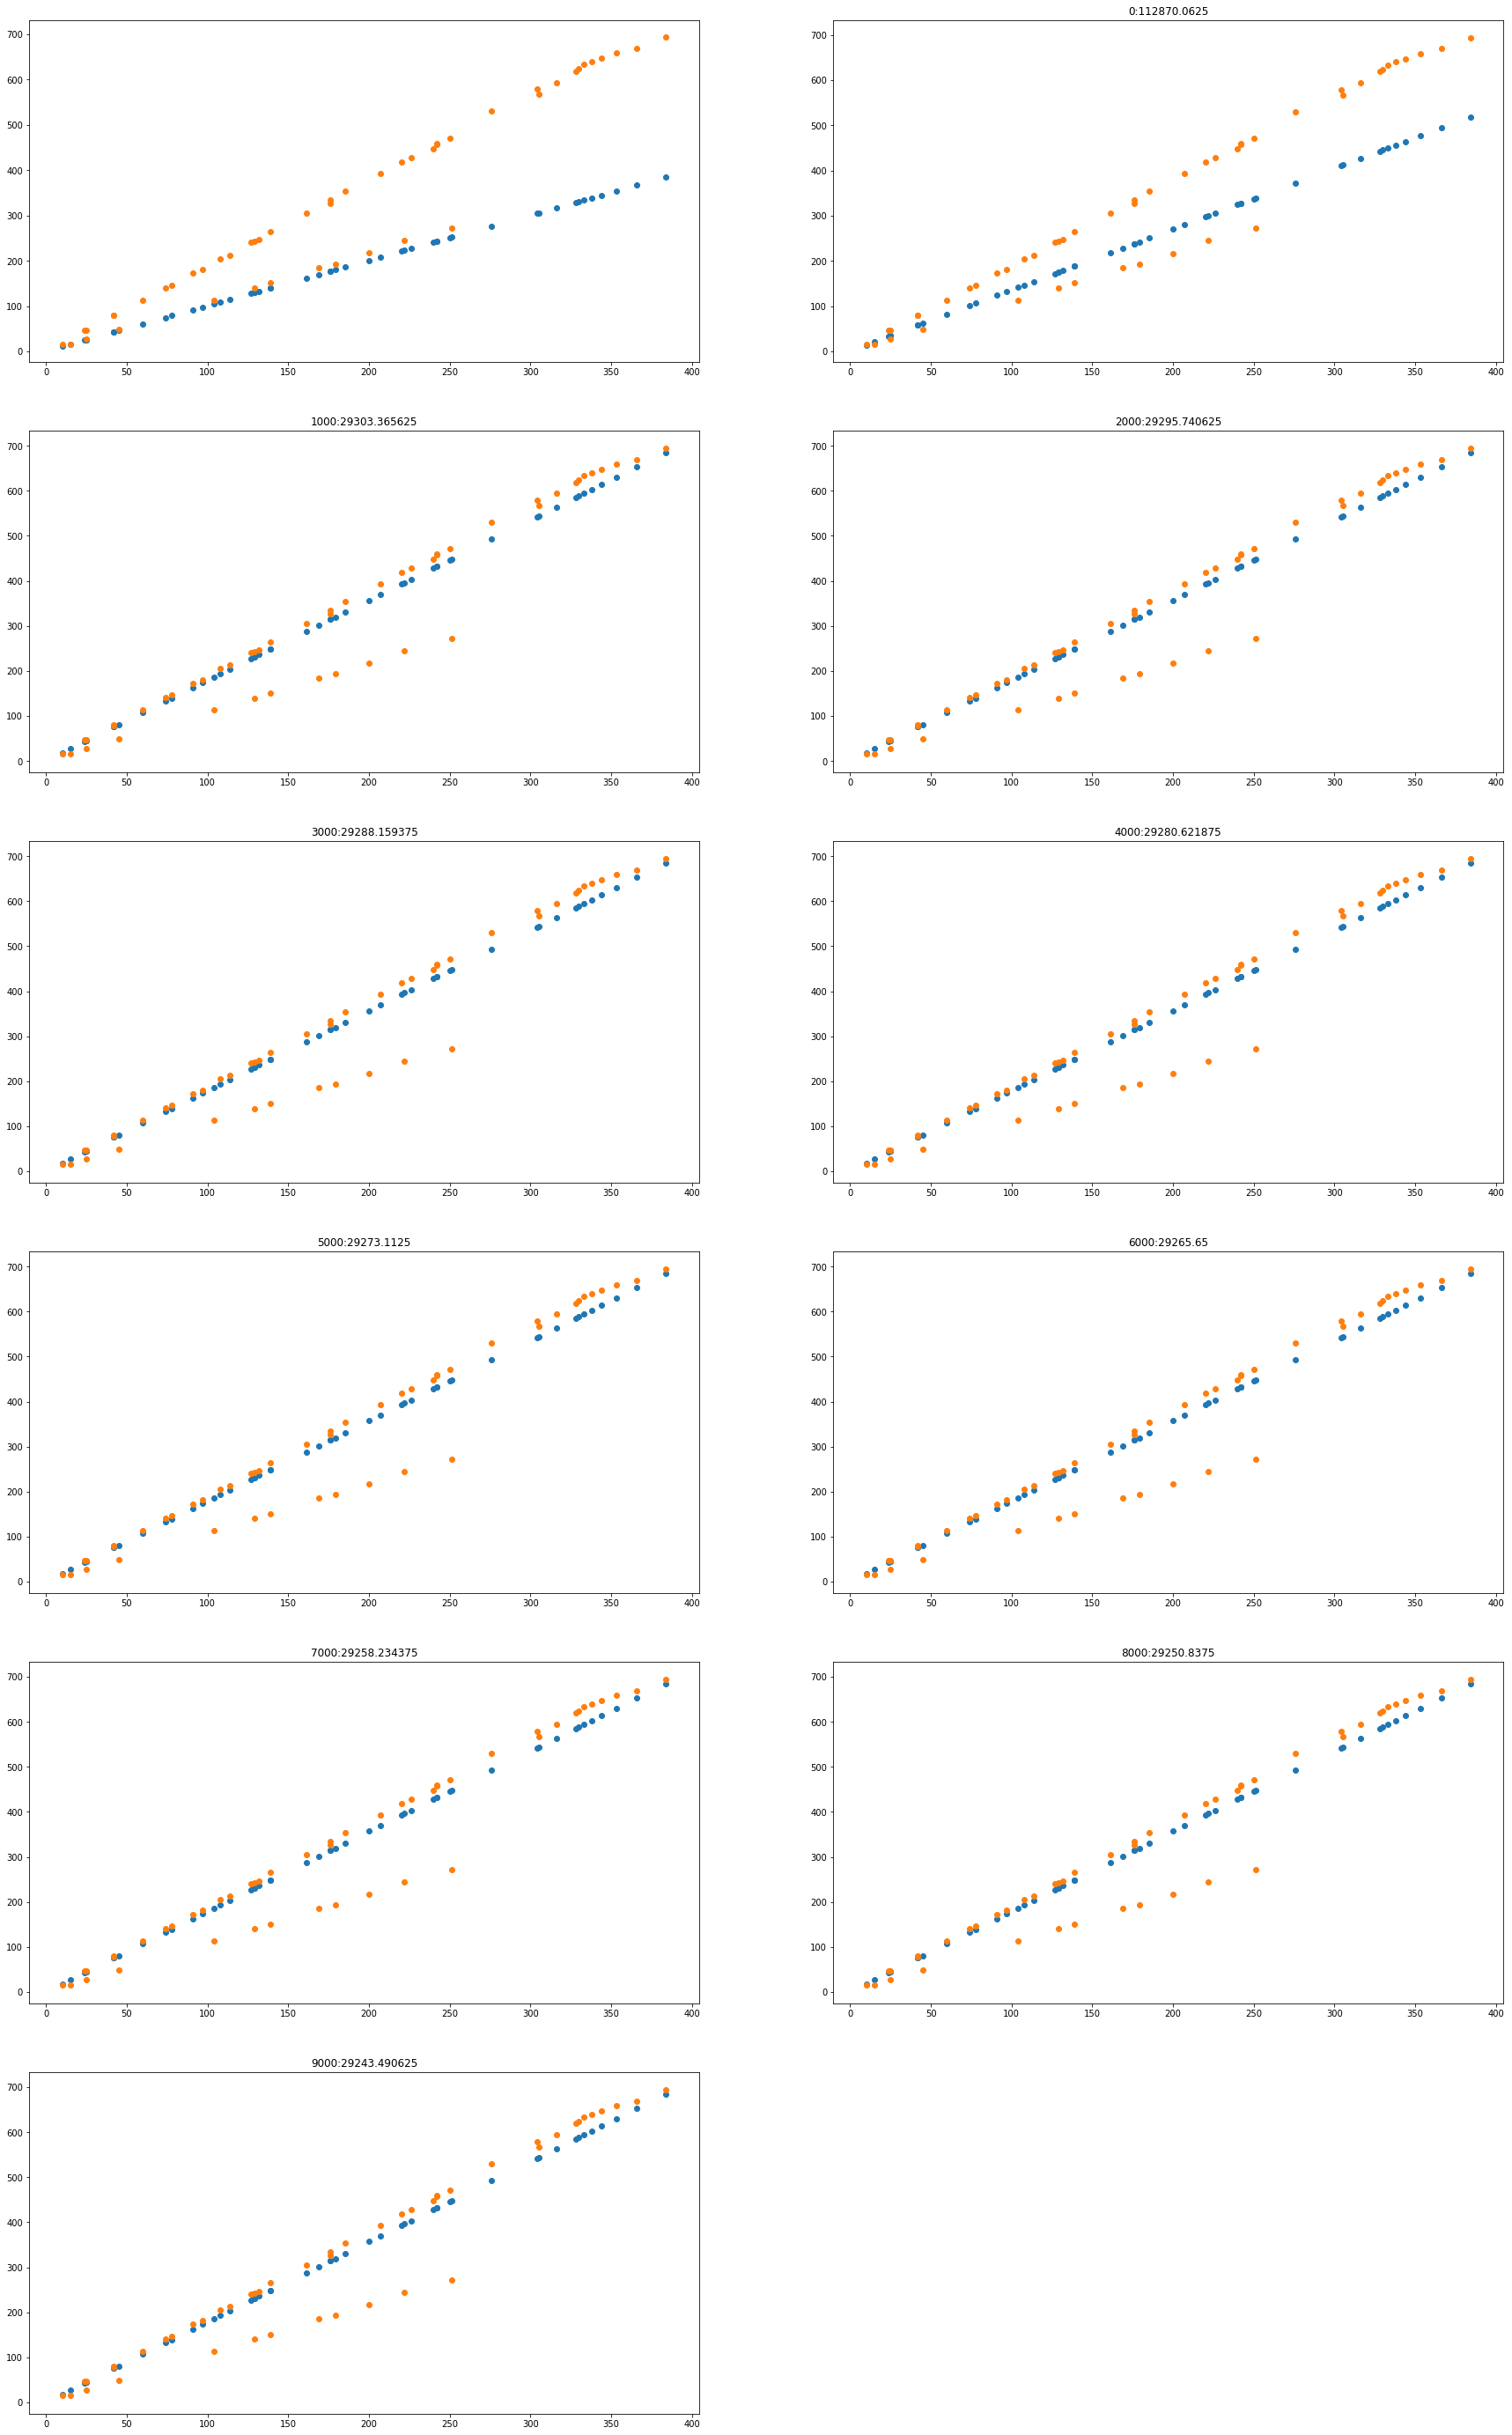

In [107]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
plt.figure(figsize=(30, 50))



index =0
predict_cp = sess.run(linear_model,{x:cp})

#Draw Chart
ax  = plt.subplot(6,2,1)
ax.scatter( cp,predict_cp)
ax.scatter( cp,newcp)  
for i in range(10000):
    
    # Do Update !!!!
    sess.run(train, {x:cp, y: newcp})
    
    
    if i%1000==0 :
        predict_cp = sess.run(linear_model,{x:cp})
        index +=1
        error = sess.run(loss, {x: cp,y: newcp})/5
        
        #Draw Chart
        ax  = plt.subplot(6,2,index+1)
        ax.set_title(str(i)+":" + str(error))
        ax.scatter( cp,predict_cp)
        ax.scatter( cp,newcp)
plt.show()